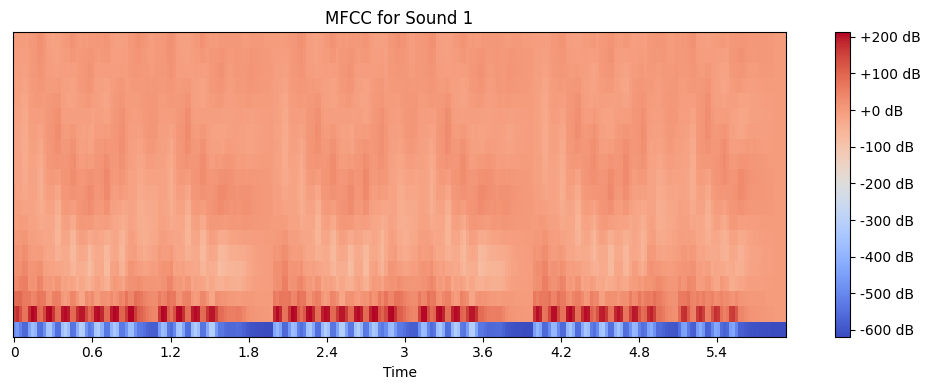

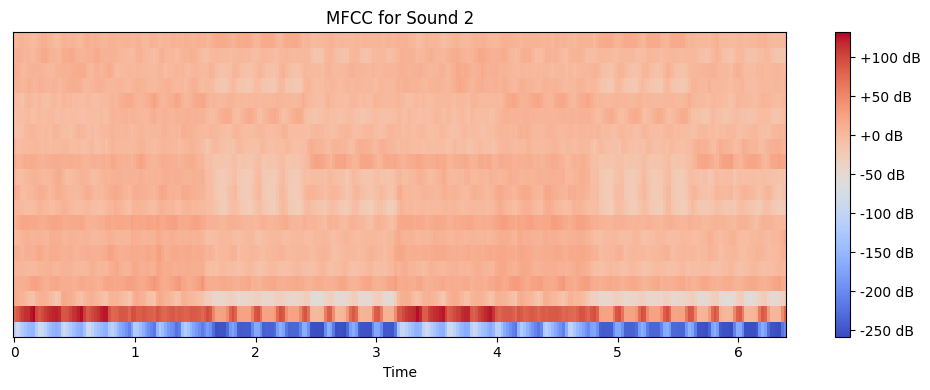

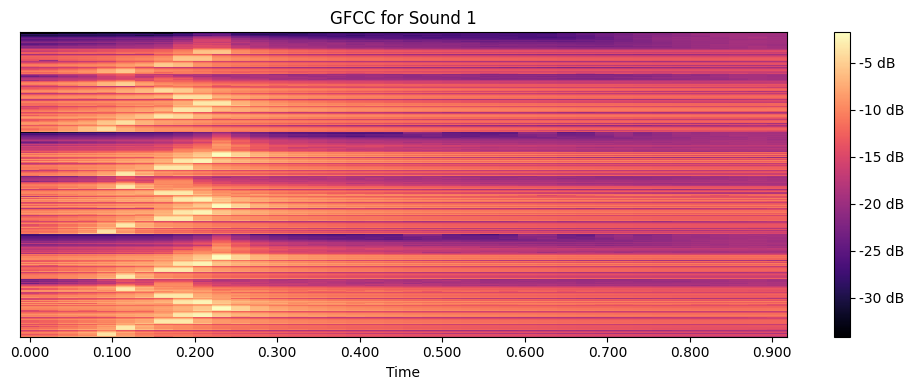

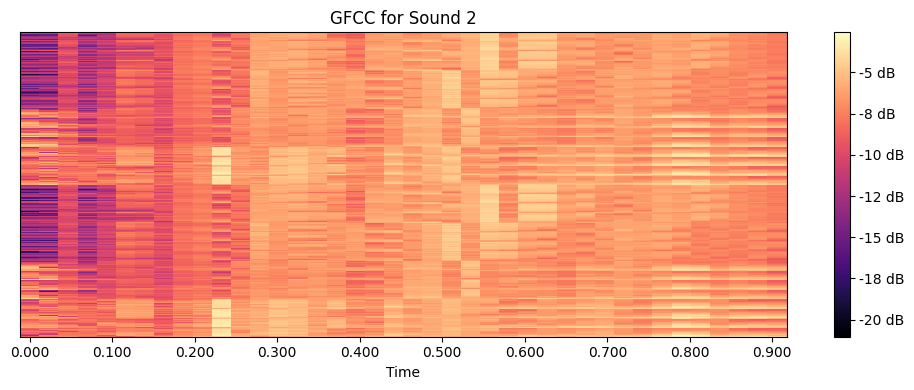

ValueError: shapes (20,256) and (20,256) not aligned: 256 (dim 1) != 20 (dim 0)

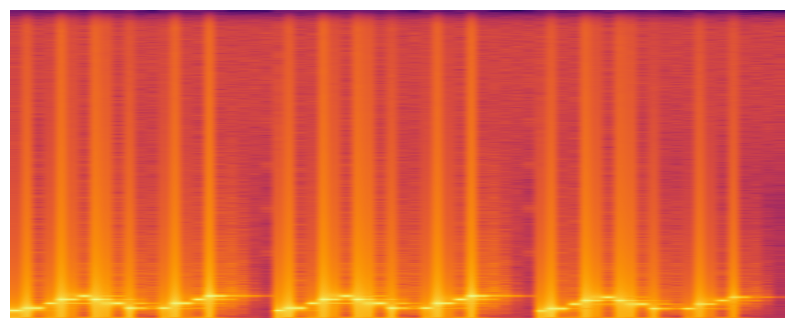

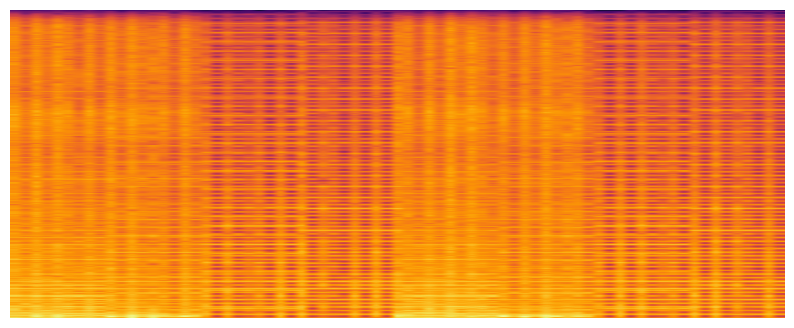

In [25]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

# 10.1 Загрузка звуковых файлов
sound1, sr1 = librosa.load('sound1.wav')
sound2, sr2 = librosa.load('sound2.wav')

# 10.2 Определение спектральных характеристик
# Спектр
fft_sound1 = fft(sound1)
fft_sound2 = fft(sound2)

# Мел-кепстральные коэффициенты (MFCC)
mfcc_sound1 = librosa.feature.mfcc(y=sound1, sr=sr1)
mfcc_sound2 = librosa.feature.mfcc(y=sound2, sr=sr2)

# Гамматон-частотные кепстральные коэффициенты (GFCC)
from python_speech_features import logfbank

# Вычисление GFCC
gfcc_sound1 = logfbank(sound1, sr1, nfilt=40)
gfcc_sound2 = logfbank(sound2, sr2, nfilt=40)

# Графики MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_sound1, sr=sr1, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC for Sound 1')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_sound2, sr=sr2, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC for Sound 2')
plt.tight_layout()
plt.show()

# Графики GFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(gfcc_sound1, sr=sr1, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('GFCC for Sound 1')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
librosa.display.specshow(gfcc_sound2, sr=sr2, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('GFCC for Sound 2')
plt.tight_layout()
plt.show()

# 10.3 Построение спектрограммы
plt.figure(figsize=(10, 4))
plt.specgram(sound1, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap='inferno', sides='default', mode='default', scale='dB');
plt.axis('off');

plt.figure(figsize=(10, 4))
plt.specgram(sound2, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap='inferno', sides='default', mode='default', scale='dB');
plt.axis('off');

# 10.4 Анализ похожести и отличия звуков
min_len1 = min(mfcc_sound1.shape[0], mfcc_sound2.shape[0])
min_len2 = min(mfcc_sound1.shape[1], mfcc_sound2.shape[1])
dist_mfcc = np.dot(mfcc_sound1[:min_len1, :min_len2], mfcc_sound2[:min_len1, :min_len2])/(np.linalg.norm(mfcc_sound1[:min_len1, :min_len2])*np.linalg.norm(mfcc_sound2[:min_len1, :min_len2]))

min_len1 = min(gfcc_sound1.shape[0], gfcc_sound2.shape[0])
min_len2 = min(gfcc_sound1.shape[1], gfcc_sound2.shape[1])
dist_gfcc = np.dot(gfcc_sound1[:min_len1, :min_len2], gfcc_sound2[:min_len1, :min_len2])/(np.linalg.norm(gfcc_sound1[:min_len1, :min_len2])*np.linalg.norm(gfcc_sound2[:min_len1, :min_len2]))


print(f"Косинусное расстояние между усредненными MFCCs: {dist_mfcc}")
print(f"Косинусное расстояние между усредненными GFCCs: {dist_gfcc}")